In [3]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

In [4]:
from transformers import BertModel, BertTokenizer

# Load TinyBERT tokenizer and mode
tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')
model = BertModel.from_pretrained('prajjwal1/bert-tiny')

In [5]:
responses = pd.read_csv('responses.csv', usecols=range(0, 19))
#responses = pd.read_csv('responses.csv')
responses.head()

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,item_id,item_type,response,prompt,points_possible,points_earned,dt_submitted,completes_page,attempt
0,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7535ba88-d131-4eee-b392-36f5e11c85ce,ch1-0,code,# type whatever you want\n# see... blah blah b...,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T05:42:37Z,True,1
1,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,1d4a6d2c-0cb1-4d19-9218-b673982e9f2f,ch1-0,code,# type whatever you want\n# see... blah blah b...,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-03-30T05:04:23Z,True,1
2,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,94a09f74-2d8c-4379-92ad-7fe5b02ec188,ch1-0,code,# what is 5+5\n# see a lion\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:25:59Z,True,1
3,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,20a47775-9594-4800-9857-fd09633c561f,ch1-0,code,# Sample comment\n# Sample commment 2\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:23:59Z,True,1
4,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7ea35ae6-4aee-4c17-b96a-e1ecb27f2b42,ch1-0,code,# type whatever you want\n# I like cows\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:35:06Z,True,1


In [6]:
items = pd.read_csv('items.csv')


In [17]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   institution_id          1335 non-null   object 
 1   class_id                1335 non-null   object 
 2   item_id                 1335 non-null   object 
 3   item_type               1335 non-null   object 
 4   chapter                 1335 non-null   object 
 5   page                    1335 non-null   object 
 6   dcl_pre_exercise_code   0 non-null      float64
 7   dcl_sample_code         1 non-null      object 
 8   dcl_solution            1 non-null      object 
 9   dcl_sct                 1 non-null      object 
 10  dcl_hint                0 non-null      float64
 11  lrn_activity_reference  129 non-null    object 
 12  lrn_question_reference  1334 non-null   object 
 13  lrn_question_position   1334 non-null   float64
 14  lrn_type                1334 non-null   

In [7]:
unique_class_ids = responses['class_id'].unique()

6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab


In [13]:
class_1 = responses[responses['class_id'] == unique_class_ids[0]].copy()
class_1.head()

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,...,lrn_dt_started,lrn_dt_saved,lrn_status,lrn_option_0,lrn_option_1,lrn_option_2,lrn_option_3,lrn_option_4,lrn_option_5,right
0,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,0780b2c5-b260-4a31-816e-e91ce8b403a0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,ceacd30b-36ff-413e-9d7d-c389ad5086cf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,ba593149-8b3c-4e1e-8df9-2b470c49a4f4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,1bacdb33-5165-44c1-9aa5-b6a904e6c463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,646acd2f-5a8b-4629-b753-faff3ff49b8c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
class_1.loc[:, 'right'] = class_1['points_earned'] / class_1['points_possible']

In [18]:
mean_right_by_prompt = class_1.groupby('prompt')['right'].mean()

In [19]:
sorted_mean_right_by_prompt = mean_right_by_prompt.sort_values()

# Display the top 5 mean prompts
top_5_mean_prompts = sorted_mean_right_by_prompt.tail(5)
print("Top 5 mean prompts:")
print(top_5_mean_prompts)

# Display the bottom 5 mean prompts
bottom_5_mean_prompts = sorted_mean_right_by_prompt.head(5)
print("\nBottom 5 mean prompts:")
print(bottom_5_mean_prompts)

Top 5 mean prompts:
prompt
Would it be possible to represent this same model, but instead of plotting height on the x-axis, plot age, and instead of drawing lines for 3 different ages, draw lines for 3 different heights? Why or why not?                                                                    NaN
Write a word equation for the researchers’ hypothesis that both the condition and gender of the server would explain the variation in tip percentage.                                                                                                                                NaN
You can try it yourself. Enter a random number between 1 and 20 here.                                                                                                                                                                                                                NaN
You previously learned that a quantitative variable should go into <code>gf_histogram()</code>. Does this mean that only quantitat

In [7]:
valid_class = ['074123e7-cd90-4500-86fe-286aaa733bf5', 'b7489f46-1d28-4c69-9901-3fb8bf9b85a6', '51711479-441b-4c02-aef7-517aca63a53f', '84444a0e-2905-46a8-bc93-5f566c0c1916', 'cc1ffb2e-5555-4109-8ad8-2d49cb54ad10', '6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab', '98119d92-8cc6-416a-972c-630351726223', '7a987176-7e55-45b5-a715-7f56c59d5f49', 'c7008a64-b43c-4eb4-bebf-07b08b9894ad', 'bc650f4f-11f0-439a-a90a-47726724c811', '79662249-02f6-48d8-aa99-1e1c0aeea77d', '34036ef8-17eb-4e96-b97e-8ec8054a290f', '8589cd83-192c-44c8-b649-cd848e519530', '3631cec9-51d3-4237-906f-a142a715be51', 'afcb6b4e-a0c0-46ce-b38c-c96329c91471', '173bd102-4560-470f-b4f1-9841e55f7f37', '0d546479-6f77-4477-9c7e-365cd36c97eb', '40e49bfa-f6cb-42fa-a3a4-b23592b799ec', '2294d558-6f5d-41c5-8d28-7b5280970f95', '97c61e74-5a20-4cf5-bf67-8f8db750d0e7', 'd0b4f5e2-6d8f-4828-91cd-3f4714b821b0', 'b16b895d-ca1d-4330-a36d-c43fb33436e5', 'ec76b77f-7635-4b9d-9975-f28bc334e336', '552ede8f-6b54-426d-8d29-abdc43a668cb', '9fad0c9e-9d3d-4eed-ada6-3959bd6d712c', '52619962-72f6-4716-9c64-1c06fe10f739', '312e145c-f6b8-4f25-a73e-4d9f5b5926c0', '60e05fa5-c986-4973-9833-16238720b727', '686478e7-82ac-4e6c-a3ec-2da0076ef868']

In [8]:
responses_small = responses[responses['class_id'].isin(valid_class)]


In [8]:
responses_small.head()

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,item_id,item_type,response,prompt,points_possible,points_earned,dt_submitted,completes_page,attempt
0,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7535ba88-d131-4eee-b392-36f5e11c85ce,ch1-0,code,# type whatever you want\n# see... blah blah b...,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T05:42:37Z,True,1
1,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,1d4a6d2c-0cb1-4d19-9218-b673982e9f2f,ch1-0,code,# type whatever you want\n# see... blah blah b...,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-03-30T05:04:23Z,True,1
2,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,94a09f74-2d8c-4379-92ad-7fe5b02ec188,ch1-0,code,# what is 5+5\n# see a lion\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:25:59Z,True,1
3,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,20a47775-9594-4800-9857-fd09633c561f,ch1-0,code,# Sample comment\n# Sample commment 2\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:23:59Z,True,1
4,College / Advanced Statistics and Data Science...,v5.0-exp2,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,False,292cff87-3c74-4e94-8622-233afb0427dd,6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab,7ea35ae6-4aee-4c17-b96a-e1ecb27f2b42,ch1-0,code,# type whatever you want\n# I like cows\n,# type whatever you want\n# see... blah blah b...,1.0,1.0,2023-04-04T06:35:06Z,True,1


In [1]:
responses_small.to_csv('responses_small.csv', index=False)

NameError: name 'eoc_pulse' is not defined

In [9]:
unique_item_types = responses_small['item_type'].unique()
print(unique_item_types)


['code' 'learnosity' 'learnosity-activity']


In [10]:
items.head()

,institution_id,class_id,item_id,item_type,chapter,page,dcl_pre_exercise_code,dcl_sample_code,dcl_solution,dcl_sct,dcl_hint,lrn_activity_reference,lrn_question_reference,lrn_question_position,lrn_type,lrn_template_name,chapter_number,section_number,review_flag
0,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,NaN,NaN,1800c247-fec5-45a0-aa40-3eb7ed5eeed7,5.0,mcq,Multiple choice – block layout,NaN,NaN,False
1,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,NaN,NaN,917f3647-c6dd-473c-9e16-2e0fc4d48344,3.0,mcq,Multiple choice – block layout,NaN,NaN,False
2,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,NaN,NaN,b16697ea-eb7e-4b3d-b540-c35bf1bbd5a3,4.0,mcq,Multiple choice – block layout,NaN,NaN,False
3,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,NaN,NaN,dc46c6fb-c7a4-4590-a133-fbf6c4709aad,2.0,mcq,Multiple choice – block layout,NaN,NaN,False
4,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,NaN,NaN,ebe48663-2263-4eb0-acc4-cf71dfb1e3f8,1.0,mcq,Multiple choice – block layout,NaN,NaN,False


In [11]:
unique_questions = items['lrn_type'].unique()
print(unique_questions)

['mcq' 'shorttext' 'choicematrix' 'plaintext' nan 'clozeassociation'
 'association' 'imageclozeassociation' 'sortlist' 'formulaV2']


In [9]:
# Assuming items and responses are your DataFrames
merged_df = pd.merge(items, responses, on=['item_id', 'class_id'])

In [10]:
merged_df.head()

,institution_id_x,class_id,item_id,item_type_x,chapter_x,page_x,dcl_pre_exercise_code,dcl_sample_code,dcl_solution,dcl_sct,...,institution_id_y,student_id,item_type_y,response,prompt,points_possible,points_earned,dt_submitted,completes_page,attempt
0,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,b03877b2-5f20-495c-8e28-d9179bff0eb9,learnosity,"[""1""]",What browser should you use to work through th...,1.0,1.0,2023-01-14T23:58:51Z,True,1
1,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,b03877b2-5f20-495c-8e28-d9179bff0eb9,learnosity,"[""2""]",What does it mean if there is no <strong>Try A...,1.0,1.0,2023-01-14T23:58:51Z,True,1
2,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,4f025cde-00fb-4c70-907f-5106446d9b5b,learnosity,"[""2""]",What does it mean if there is no <strong>Try A...,1.0,1.0,2023-01-14T23:08:13Z,True,1
3,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,4f025cde-00fb-4c70-907f-5106446d9b5b,learnosity,"[""3""]",This&nbsp;button appears in the lower right co...,1.0,0.0,2023-01-14T23:08:13Z,True,1
4,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,4f025cde-00fb-4c70-907f-5106446d9b5b,learnosity,"[""1""]",What browser should you use to work through th...,1.0,1.0,2023-01-14T23:08:13Z,True,1


In [11]:
# Assuming items and responses are your merged DataFrame
plaintext_rows = merged_df[merged_df['lrn_type'] == 'plaintext']

In [12]:
plaintext_rows.head()

,institution_id_x,class_id,item_id,item_type_x,chapter_x,page_x,dcl_pre_exercise_code,dcl_sample_code,dcl_solution,dcl_sct,...,institution_id_y,student_id,item_type_y,response,prompt,points_possible,points_earned,dt_submitted,completes_page,attempt
20000,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,Pre_Conf_Conc,learnosity-activity,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,learnosity-activity,[[0]],NaN,NaN,NaN,2022-12-22T07:27:53Z,False,1
20001,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,Pre_Conf_Conc,learnosity-activity,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,learnosity-activity,[[4]],NaN,NaN,NaN,2022-12-22T07:27:53Z,False,1
20002,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,Pre_Conf_Conc,learnosity-activity,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,learnosity-activity,I'm concerned that I'm not going to do well an...,"When I think about this class, I'm concerned t...",NaN,NaN,2022-12-22T07:27:53Z,False,1
20003,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,Pre_Conf_Conc,learnosity-activity,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,3cc14c3e-8586-4017-80c1-152954ebbe2a,learnosity-activity,Not concerned at all. Looking forward to this ...,"When I think about this class, I'm concerned t...",NaN,NaN,2022-12-23T00:39:10Z,True,1
20004,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,Pre_Conf_Conc,learnosity-activity,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,3cc14c3e-8586-4017-80c1-152954ebbe2a,learnosity-activity,[[0]],NaN,NaN,NaN,2022-12-23T00:39:10Z,True,1


In [13]:
# Assuming plaintext_rows_copy is your DataFrame with rows where lrn_type is 'plaintext'
plaintext_rows = plaintext_rows.loc[:, ['class_id', 'student_id', 'response', 'prompt']]

In [14]:
# Assuming plaintext_rows is your DataFrame with rows where lrn_type is 'plaintext'
plaintext_rows_copy = plaintext_rows.copy()

# Now, drop rows with any missing values from the copied DataFrame
plaintext_rows_copy.dropna(inplace=True)


In [15]:
plaintext_rows_copy.head()

,class_id,student_id,response,prompt
20002,074123e7-cd90-4500-86fe-286aaa733bf5,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,I'm concerned that I'm not going to do well an...,"When I think about this class, I'm concerned t..."
20003,074123e7-cd90-4500-86fe-286aaa733bf5,3cc14c3e-8586-4017-80c1-152954ebbe2a,Not concerned at all. Looking forward to this ...,"When I think about this class, I'm concerned t..."
20006,074123e7-cd90-4500-86fe-286aaa733bf5,919db96b-3670-4a1e-9a4d-9591f38f8ef4,I’m concerned that I will fall behind in R cod...,"When I think about this class, I'm concerned t..."
20015,074123e7-cd90-4500-86fe-286aaa733bf5,41422302-20a7-417e-88ea-3b29631a418d,I will struggle with mathematics,"When I think about this class, I'm concerned t..."
20018,074123e7-cd90-4500-86fe-286aaa733bf5,9bb87c84-0d85-4fd6-bdf9-197541697b0d,I'm concerned that I will do well on homework ...,"When I think about this class, I'm concerned t..."


In [2]:
import pandas as pd
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")  # or any other pre-trained model


TypeError: issubclass() arg 1 must be a class

In [ ]:

# Function to calculate thoughtfulness score for a single response
def calculate_thoughtfulness(response, question):
    # Tokenize and get embeddings for response and question
    response_doc = nlp(response)
    question_doc = nlp(question)
    
    # Calculate similarity between response and question
    similarity_score = response_doc.similarity(question_doc)
    
    return similarity_score


# Calculate thoughtfulness score for each response and store it in a new column
df['thoughtfulness'] = df.apply(lambda row: calculate_thoughtfulness(row['responses'], row['question']), axis=1)

# Display the DataFrame with the new column
print(df)


In [16]:
import torch


In [17]:
#import pandas as pd
#import numpy as np
#from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased')

# Function to calculate thoughtfulness score for a single response
def calculate_thoughtfulness(response):
    # Tokenize the response
    tokens = tokenizer(response, return_tensors="pt", max_length=512, truncation=True)
    
    # Use the model to obtain embeddings
    with torch.no_grad():
        # Forward pass through the model to get embeddings
        outputs = model(**tokens)
    
    # Extract embeddings from the output
    embeddings = outputs.last_hidden_state.detach().numpy()
    
    # Process the embeddings to calculate thoughtfulness score
    # Here, you can define your own logic to calculate the score
    # For demonstration, let's simply use the mean of the embeddings as the score
    thoughtfulness_score = np.mean(embeddings)
    
    # Normalize the score to range between 0 and 1
    normalized_score = (thoughtfulness_score - min_score) / (max_score - min_score)
    
    return normalized_score


# Define the minimum and maximum scores (for normalization)
min_score = float('inf')
max_score = float('-inf')

# Calculate thoughtfulness score for each response and store it in a new column
plaintext_rows_copy['thoughtfulness'] = plaintext_rows_copy['response'].apply(calculate_thoughtfulness)

# Display the DataFrame with the new column
plaintext_rows_copy.head()


,class_id,student_id,response,prompt,thoughtfulness
20002,074123e7-cd90-4500-86fe-286aaa733bf5,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,I'm concerned that I'm not going to do well an...,"When I think about this class, I'm concerned t...",NaN
20003,074123e7-cd90-4500-86fe-286aaa733bf5,3cc14c3e-8586-4017-80c1-152954ebbe2a,Not concerned at all. Looking forward to this ...,"When I think about this class, I'm concerned t...",NaN
20006,074123e7-cd90-4500-86fe-286aaa733bf5,919db96b-3670-4a1e-9a4d-9591f38f8ef4,I’m concerned that I will fall behind in R cod...,"When I think about this class, I'm concerned t...",NaN
20015,074123e7-cd90-4500-86fe-286aaa733bf5,41422302-20a7-417e-88ea-3b29631a418d,I will struggle with mathematics,"When I think about this class, I'm concerned t...",NaN
20018,074123e7-cd90-4500-86fe-286aaa733bf5,9bb87c84-0d85-4fd6-bdf9-197541697b0d,I'm concerned that I will do well on homework ...,"When I think about this class, I'm concerned t...",NaN


In [18]:

# Display unique values for thoughtfulness
unique_thoughtfulness_values = plaintext_rows_copy['thoughtfulness'].unique()
print("Unique Thoughtfulness Values:", unique_thoughtfulness_values)

Unique Thoughtfulness Values: [nan]


In [20]:
def calculate_thoughtfulness(response):
    # Split the response into words
    words = response.split()
    # Count the number of words
    word_count = len(words)
    # You can define your own logic here to map word count to a thoughtfulness score
    # For demonstration, let's simply use the word count as the thoughtfulness score
    return word_count

plaintext_rows_copy['thoughtfulness'] = plaintext_rows_copy['response'].apply(calculate_thoughtfulness)

In [21]:
plaintext_rows_copy.head()

,class_id,student_id,response,prompt,thoughtfulness
20002,074123e7-cd90-4500-86fe-286aaa733bf5,53f3a54c-37ba-49c0-a9eb-a9b1734c1853,I'm concerned that I'm not going to do well an...,"When I think about this class, I'm concerned t...",26
20003,074123e7-cd90-4500-86fe-286aaa733bf5,3cc14c3e-8586-4017-80c1-152954ebbe2a,Not concerned at all. Looking forward to this ...,"When I think about this class, I'm concerned t...",24
20006,074123e7-cd90-4500-86fe-286aaa733bf5,919db96b-3670-4a1e-9a4d-9591f38f8ef4,I’m concerned that I will fall behind in R cod...,"When I think about this class, I'm concerned t...",15
20015,074123e7-cd90-4500-86fe-286aaa733bf5,41422302-20a7-417e-88ea-3b29631a418d,I will struggle with mathematics,"When I think about this class, I'm concerned t...",5
20018,074123e7-cd90-4500-86fe-286aaa733bf5,9bb87c84-0d85-4fd6-bdf9-197541697b0d,I'm concerned that I will do well on homework ...,"When I think about this class, I'm concerned t...",34


In [22]:
plaintext_rows_copy.to_csv('plaintext_rows_copy.csv', index=False)

In [24]:
sorted_df = plaintext_rows_copy.sort_values(by='student_id')
sorted_df.head()

,class_id,student_id,response,prompt,thoughtfulness
318710,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,The Height2Group has more categories than the ...,Why is the PRE larger in the <code>Height</cod...,13
222190,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,Her z-score is 3 standard deviations above the...,In what sense is the Spargle player a better g...,20
239339,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,We know that females tend to have shorter thum...,"Under the empty model, we would predict the th...",31
123405,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,15,You can try it yourself. Enter a random number...,1
123406,074123e7-cd90-4500-86fe-286aaa733bf5,001824fb-a2fd-431d-aef6-7a1250d97a62,Any number between 1 and 20 would be random b...,How did you decide what number would count as ...,22


In [29]:
averaged_df = plaintext_rows_copy.groupby('student_id')['thoughtfulness'].mean().reset_index()
averaged_df.head()

,student_id,thoughtfulness
0,001824fb-a2fd-431d-aef6-7a1250d97a62,23.323864
1,01bd8559-8276-4299-9ee4-248c4b4af2a9,24.342857
2,02b7468a-2c49-474d-8c6b-3188904fd85e,28.630682
3,0556b794-cd80-4af6-8cfa-8055462c215a,30.579545
4,059a058b-784a-4a5e-8688-11ee7c2dd5e7,31.579096


In [31]:
averaged_df.to_csv('thought.csv', index=False)

In [32]:
averaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      219 non-null    object 
 1   thoughtfulness  219 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [35]:
df = pd.read_csv('cluster_data.csv')
df.head()

,thoughtfulness,engaged,Pulse,EOC,Rev,Cluster,student_id
0,23.323864,185561041.0,4.159091,0.748087,274,0,001824fb-a2fd-431d-aef6-7a1250d97a62
1,0.000000,158365058.0,4.431818,0.567986,27,0,0096491a-77bf-4e79-b906-fc7a8e5e57a6
2,0.000000,93017434.0,3.850000,0.849111,34,1,00fe5bb2-6b64-4a36-a706-eac4dc124ea7
3,0.000000,14547228.0,4.000000,0.854545,20,1,016e2fcf-0cc2-42ad-844d-e1057b5081cc
4,0.000000,62052885.0,3.666667,0.638054,11,2,01805fac-7187-40e3-8a7e-1dda3c6c87f2


In [120]:
# Assuming 'student_id' is the common column
merged_df = pd.merge(df, responses_small, on='student_id')
merged_df = pd.merge(items, merged_df, on='item_id')

# Display the merged DataFrame
merged_df.head()

,institution_id_x,class_id_x,item_id,item_type_x,chapter_x,page_x,dcl_pre_exercise_code,dcl_sample_code,dcl_solution,dcl_sct,...,institution_id_y,class_id_y,item_type_y,response,prompt,points_possible,points_earned,dt_submitted,completes_page,attempt
0,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,learnosity,"[""1""]",What browser should you use to work through th...,1.0,1.0,2022-12-17T05:59:54Z,True,1
1,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,learnosity,"[""5""]",This&nbsp;button appears in the lower right co...,1.0,0.0,2022-12-17T05:59:54Z,True,1
2,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,learnosity,"[""1""]",Where would you go to check which pages you ha...,1.0,1.0,2022-12-17T05:59:54Z,True,1
3,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,learnosity,"[""1""]",Why would you click on the <strong>Try Again</...,1.0,1.0,2022-12-17T05:59:54Z,True,1
4,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,First_Things_First_Quiz,learnosity,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,NaN,NaN,...,292cff87-3c74-4e94-8622-233afb0427dd,074123e7-cd90-4500-86fe-286aaa733bf5,learnosity,"[""2""]",What does it mean if there is no <strong>Try A...,1.0,1.0,2022-12-17T05:59:54Z,True,1


In [121]:
mid_group = merged_df[merged_df['Cluster'] == 2]
mid_group = mid_group[mid_group['completes_page'] == True]
mid_groupA = mid_group[mid_group['points_possible'] == mid_group['points_earned']]
mid_groupB = mid_group[mid_group['points_possible'] != mid_group['points_earned']]

print(mid_groupA.shape)
print(mid_groupB.shape)

(20445, 43)
(72883, 43)


In [122]:
# Assuming your DataFrame is named 'mid_group'
column_names = mid_group.columns

# Display all the column names
print(column_names)

Index(['institution_id_x', 'class_id_x', 'item_id', 'item_type_x', 'chapter_x',
       'page_x', 'dcl_pre_exercise_code', 'dcl_sample_code', 'dcl_solution',
       'dcl_sct', 'dcl_hint', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_template_name', 'chapter_number_x', 'section_number_x',
       'review_flag_x', 'thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev',
       'Cluster', 'student_id', 'book', 'release', 'chapter_y', 'page_y',
       'chapter_number_y', 'section_number_y', 'review_flag_y',
       'institution_id_y', 'class_id_y', 'item_type_y', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt'],
      dtype='object')


In [123]:
# Calculate the distribution of lrn_type for mid_groupA
lrn_type_distribution_A = mid_groupA['lrn_type'].value_counts(normalize=True)

# Calculate the distribution of lrn_type for mid_groupB
lrn_type_distribution_B = mid_groupB['lrn_type'].value_counts(normalize=True)

# Display the distributions
print("LRN Type Distribution for Mid Group A:")
print(lrn_type_distribution_A)
print("\nLRN Type Distribution for Mid Group B:")
print(lrn_type_distribution_B)


LRN Type Distribution for Mid Group A:
lrn_type
mcq                      0.820936
association              0.100127
plaintext                0.052266
clozeassociation         0.013996
choicematrix             0.009151
imageclozeassociation    0.003377
shorttext                0.000098
formulaV2                0.000049
Name: proportion, dtype: float64

LRN Type Distribution for Mid Group B:
lrn_type
mcq                      0.601526
plaintext                0.202201
choicematrix             0.083216
shorttext                0.079237
association              0.028210
clozeassociation         0.002758
imageclozeassociation    0.002744
formulaV2                0.000110
Name: proportion, dtype: float64


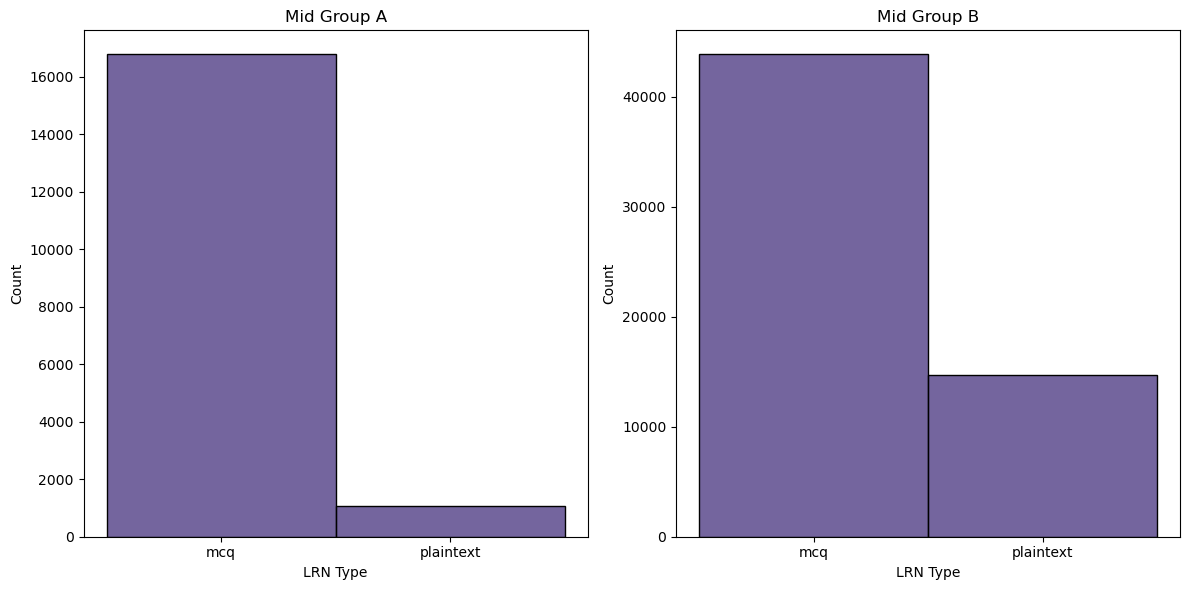

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 'mcq' and 'plaintext' lrn_type in mid_groupA
mid_groupA_filtered = mid_groupA[mid_groupA['lrn_type'].isin(['mcq', 'plaintext'])]

# Filter data for 'mcq' and 'plaintext' lrn_type in mid_groupB
mid_groupB_filtered = mid_groupB[mid_groupB['lrn_type'].isin(['mcq', 'plaintext'])]

# Set the color palette to viridis
sns.set_palette("viridis")

# Plotting
plt.figure(figsize=(12, 6))

# Plot for mid_groupA
plt.subplot(1, 2, 1)
sns.histplot(data=mid_groupA_filtered, x='lrn_type', binwidth=0.5, kde=False)
plt.title('Mid Group A')
plt.xlabel('LRN Type')
plt.ylabel('Count')

# Plot for mid_groupB
plt.subplot(1, 2, 2)
sns.histplot(data=mid_groupB_filtered, x='lrn_type', binwidth=0.5, kde=False)
plt.title('Mid Group B')
plt.xlabel('LRN Type')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()